In [5]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plot
import numpy as np

Partie A DATA

In [6]:
from tensorflow.keras.datasets import cifar10

In [46]:
#data loading
(x_train_data, y_train_data),(x_test_data, y_test_data) = datasets.cifar10.load_data()

In [50]:
#train_shape
x_train_data.shape

(50000, 32, 32, 3)

In [51]:
#test_shape
x_test_data.shape

(10000, 32, 32, 3)

In [56]:
#creation des classes de cifar10
num_classe = 10
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [136]:
#data processing
y_train = keras.utils.to_categorical(y_train_data , num_classe) #attribuer les classes a notre target
x_train = x_train_data.reshape(50000,32,32,3) #transforme les données
#x_train= x_train.astype('float32') # on change aussi le format
#x_train= x_train/255 #on normalise nos données 
#x_test= x_test_data/255

In [ ]:
y_test = keras.utils.to_categorical(y_test_data , num_classe)

In [60]:
#il faut faire un reshape de y_train_data
y_train = y_train_data.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

partie B reseau

On commence par faire un reseau de neurone Artificiel pour voir ce que ça va donner

#ANN

In [26]:
Dense= layers.Dense

In [40]:
ann= models.Sequential()
p=100
ann.add(Dense(p, input_dim=32*32*3, activation='sigmoid'))
ann.add(Dense(p, activation='sigmoid'))
ann.add(Dense(p, activation='sigmoid'))
ann.add(Dense(p, activation='sigmoid'))
ann.add(Dense(10, activation='softmax'))

In [41]:
mysgd= optimizers.SGD(lr= 0.1, decay= 1e-6 ,momentum=0.9, nesterov=True)
ann.compile(loss='categorical_crossentropy', optimizer=mysgd, metrics=['accuracy'])

In [42]:
ann.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.2150 - accuracy: 0.1345
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0478 - accuracy: 0.1928
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0740 - accuracy: 0.1843
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0845 - accuracy: 0.1814
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0767 - accuracy: 0.1832
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0760 - accuracy: 0.1870
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0665 - accuracy: 0.1877
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0677 - accuracy: 0.1896
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0559 - accuracy: 0.1995
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.068

avec une 'Accurancy sur le train' de 19,60%.. c'est très faible.

In [214]:
y_pred_ann = ann.predict(x_test)
y_pred_ann[:5]

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.0443917e-17,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.4863066e-10, 1.0000000e+00,
        0.0000000e+00, 2.2041937e-33, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.5144405e-31, 0.0000000e+00, 2.9711333e-30,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.2175205e-27,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.4450940e-06, 1.0000000e+00,
        0.0000000e+00, 2.4200280e-27, 0.0000000e+00, 1.7230349e-06,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [219]:
y_classes_ann = [np.argmax(element) for element in y_pred_ann]
y_classes_ann[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [222]:
y_test_r = y_test_data.reshape(-1,)

In [223]:
y_test_r[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

on voit que l'algorithme se plente completement. sur les 10 premieres observations

In [61]:
def plot_sample(x,y,index):
    plot.figure(figsize=(15,2))
    plot.imshow(x[index])
    plot.xlabel(classes[y[index]])

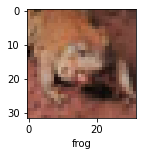

In [225]:
plot_sample(x_test,y_test_r,5)

In [226]:
classes[y_classes_ann[5]]

'airplane'

sur la derniere Observation l'algorithme nous predit airplane alors qu'on a une grenouille.

# on fait un nouveau modele de reseau de neuronne convultif

In [128]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((4,4)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [115]:
input_shape=(32,32,3)

In [140]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.0504 - accuracy: 0.3152
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5940 - accuracy: 0.4256
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4891 - accuracy: 0.4666
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4194 - accuracy: 0.4967
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3564 - accuracy: 0.5192
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3124 - accuracy: 0.5352
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2757 - accuracy: 0.5474
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2477 - accuracy: 0.5607
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2188 - accuracy: 0.5698
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [186]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3099 - accuracy: 0.5560


[1.3099298477172852, 0.5559999942779541]

In [227]:
score_cnn = cnn.evaluate(x_test, y_test,batch_size=100,steps=len(x_test)/100)
print("Test accuracy:", score_cnn[1])

100/100 [==============================] - 1s 10ms/step - loss: 1.3099 - accuracy: 0.5560
Test accuracy: 0.5559999942779541


notre reseau de neurone convultif a une precision de 55% c'est juste la moyenne

In [207]:
y_pred_cnn = cnn.predict(x_test)
y_pred_cnn[:5]

array([[1.36989951e-02, 3.54693651e-01, 5.08628562e-02, 1.19185679e-01,
        3.07390410e-02, 1.26283644e-02, 2.80992799e-02, 3.70506058e-03,
        1.85323641e-01, 2.01063380e-01],
       [1.04197152e-01, 3.11292291e-01, 4.13254456e-05, 6.09019844e-06,
        2.00930936e-06, 2.16917783e-06, 4.19547348e-07, 4.74375923e-07,
        5.52062988e-01, 3.23950164e-02],
       [7.91821033e-02, 2.14152839e-02, 4.89538116e-03, 4.98273061e-04,
        1.75166945e-03, 2.35277286e-04, 6.81392048e-05, 1.06479500e-04,
        8.87424886e-01, 4.42255568e-03],
       [6.47113979e-01, 1.18722115e-02, 2.89594792e-02, 2.10248190e-03,
        3.74975265e-03, 3.79021396e-04, 1.22311976e-04, 2.43256596e-04,
        3.00219953e-01, 5.23758773e-03],
       [1.68069347e-03, 2.73383758e-03, 7.22819269e-02, 4.97576483e-02,
        6.38339892e-02, 2.40945444e-02, 7.77736545e-01, 4.50035033e-04,
        6.77318918e-03, 6.57584635e-04]], dtype=float32)

In [228]:
y_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
y_classes_cnn[:10]

[1, 8, 8, 0, 6, 6, 5, 6, 3, 1]

In [229]:
y_test_r[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

sur 10 obseravtions il predit bien les 8.
ce qui n'est pas à sous estimer.

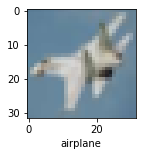

In [230]:
plot_sample(x_test,y_test_r,10)

In [231]:
classes[y_classes_cnn[10]]

'ship'

il classe un avion dans la categorie bateau

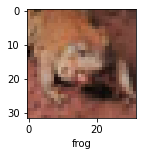

In [232]:
plot_sample(x_test,y_test_r,5)

In [233]:
classes[y_classes_cnn[5]]

'frog'

il classe bien la grenouille dans la categorie frog

# on realise un dernier reseau de neurone convultif 

In [142]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(256, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(256, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),     
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(512, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(512, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),     
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(512, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(512, kernel_size=(3, 3), padding = "same", activation="relu"),
        layers.BatchNormalization(),     
        layers.MaxPooling2D(pool_size=(2, 2)),      
        layers.Flatten(),
        layers.Dense(num_classe, activation="softmax"),
    ]
)

In [147]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 2567s 2s/step - loss: 1.3594 - accuracy: 0.5247
Epoch 2/10
1563/1563 [==============================] - 2353s 2s/step - loss: 0.8817 - accuracy: 0.7045
Epoch 3/10
1563/1563 [==============================] - 2065s 1s/step - loss: 0.6948 - accuracy: 0.7709
Epoch 4/10
1563/1563 [==============================] - 2071s 1s/step - loss: 0.5588 - accuracy: 0.8170
Epoch 5/10
1563/1563 [==============================] - 2069s 1s/step - loss: 0.4576 - accuracy: 0.8478
Epoch 6/10
1563/1563 [==============================] - 2066s 1s/step - loss: 0.3712 - accuracy: 0.8775
Epoch 7/10
1563/1563 [==============================] - 2087s 1s/step - loss: 0.2817 - accuracy: 0.9077
Epoch 8/10
1563/1563 [==============================] - 2067s 1s/step - loss: 0.2242 - accuracy: 0.9262
Epoch 9/10
1563/1563 [==============================] - 2059s 1s/step - loss: 0.1691 - accuracy: 0.9437
Epoch 10/10
1563/1563 [==============================] - 2059s 1

on trouve pour notre dernier epoch un 'accuracy' superieur à 95%.
ce dernier modele classe bien les image de CIFAR10

In [185]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 38s 122ms/step - loss: 0.6492 - accuracy: 0.8276


[0.6492181420326233, 0.8276000022888184]

In [206]:
score = model.evaluate(x_test, y_test,batch_size=100,steps=len(x_test)/100)
print("Test accuracy:", score[1])

100/100 [==============================] - 30s 303ms/step - loss: 0.6492 - accuracy: 0.8276
Test accuracy: 0.8276000022888184


In [184]:
x_test= x_test_data
x_test.shape

(10000, 32, 32, 3)

In [187]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[2.47317395e-04, 3.86332307e-04, 5.86550857e-04, 9.91621137e-01,
        1.89409111e-05, 5.63797029e-03, 8.37498170e-04, 1.76095098e-04,
        7.55695291e-05, 4.12638910e-04],
       [4.28247449e-06, 1.89708683e-11, 2.21233795e-11, 3.08674995e-11,
        7.53613938e-15, 1.26861598e-14, 1.69873837e-11, 2.18947217e-15,
        9.99995708e-01, 3.73720125e-13],
       [2.56398087e-03, 3.87082189e-01, 3.06128385e-03, 9.27287154e-03,
        6.58207573e-04, 3.49785341e-03, 1.44627020e-02, 8.90612544e-04,
        5.37843168e-01, 4.06671576e-02],
       [8.64152730e-01, 4.47358564e-03, 4.10072593e-04, 5.02080366e-04,
        1.62594079e-04, 5.91678436e-05, 9.92921923e-05, 4.30147047e-05,
        1.04894124e-01, 2.52032764e-02],
       [3.67606881e-05, 6.92727508e-06, 2.63326583e-05, 5.58952925e-05,
        4.47587445e-06, 2.65563012e-05, 9.99618530e-01, 1.71102802e-05,
        1.96608496e-04, 1.07608375e-05]], dtype=float32)

In [212]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [234]:
y_test_r[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

ce dernier classe justement toutes les images avec un precision a plus de 82%

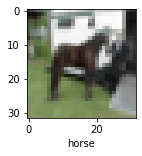

In [235]:
plot_sample(x_test, y_test_r,20)

In [236]:
classes[y_classes[20]]

'horse'

on peut voir avec le precedent exemple que ce dernier modele est le meilleur pour le classement des image de Cifar 10